In [1]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import csv

# --- Use the robust parameters here! --- <= Gemini helped me 
try:
    df = pd.read_csv(
        'amz_uk_price_prediction_dataset.csv',
        # 1. Tells pandas to ignore all quote marks, resolving the "EOF inside string" error
        quoting=csv.QUOTE_NONE,
        # 2. Skips entire rows that cause errors, like mismatched column counts
        on_bad_lines='skip',
        # 3. Explicitly use the faster C engine (good for large files)
        engine='c',
        # 4. Better for large files, avoids memory-mapping
        low_memory=False
    )
    print("--- File load attempt complete ---")
    print(f"File loaded successfully with {len(df)} rows.")
    print("\nFirst 5 rows:")
    print(df.head())

except Exception as e:
    print(f"An error occurred: {e}")

--- File load attempt complete ---
File loaded successfully with 1355311 rows.

First 5 rows:
            "uid"                                             "asin"  \
"1"  "B09B96TG33"                          "Echo Dot (5th generation   
"3"  "B09B8YWXDF"                          "Echo Dot (5th generation   
"4"  "B09B8T5VGV"               "Echo Dot with clock (5th generation   
"5"  "B09WX6QD65"  "Introducing Echo Pop | Full sound compact Wi-...   
"6"  "B09B97WSLF"               "Echo Dot with clock (5th generation   

                                               "title" "stars" "reviews"  \
"1"   2022 release) | Big vibrant sound Wi-Fi and B...   "4.7"   "15308"   
"3"   2022 release) | Big vibrant sound Wi-Fi and B...   "4.7"   "15308"   
"4"   2022 release) | Bigger vibrant sound Wi-Fi an...   "4.7"    "7205"   
"5"                                              "4.6"  "1881"   "17.99"   
"6"   2022 release) | Bigger vibrant sound Wi-Fi an...   "4.7"    "7205"   

     "price" "is

In [5]:
df.columns
df.rename(columns={'"category"': 'Category', '"uid"': 'UID', '"asin"': 'Asin', '"title"':'Title', '"stars"':'Stars', '"reviews"':'Reviews', '"price"':'Price',
       '"isBestSeller"':'Best_Seller', '"boughtInLastMonth"':'BoughtInLastMonth', '"category"':'Category'}, inplace=True)
df

,UID,Asin,Title,Stars,Reviews,Price,Best_Seller,BoughtInLastMonth,Category
"""1""","""B09B96TG33""","""Echo Dot (5th generation",2022 release) | Big vibrant sound Wi-Fi and B...,"""4.7""","""15308""","""21.99""","""False""","""0""","""Hi-Fi Speakers"""
"""3""","""B09B8YWXDF""","""Echo Dot (5th generation",2022 release) | Big vibrant sound Wi-Fi and B...,"""4.7""","""15308""","""21.99""","""False""","""0""","""Hi-Fi Speakers"""
"""4""","""B09B8T5VGV""","""Echo Dot with clock (5th generation",2022 release) | Bigger vibrant sound Wi-Fi an...,"""4.7""","""7205""","""31.99""","""False""","""0""","""Hi-Fi Speakers"""
"""5""","""B09WX6QD65""","""Introducing Echo Pop | Full sound compact Wi-...","""4.6""","""1881""","""17.99""","""False""","""0""","""Hi-Fi Speakers""",NaN
"""6""","""B09B97WSLF""","""Echo Dot with clock (5th generation",2022 release) | Bigger vibrant sound Wi-Fi an...,"""4.7""","""7205""","""31.99""","""False""","""0""","""Hi-Fi Speakers"""
...,...,...,...,...,...,...,...,...,...
"""2132600""","""B0CD7882VB""","""20PCS Micro Switch Tact Switch Silicone Butto...","""0.0""","""0""","""39.01""","""False""","""0""","""Networking Devices""",NaN
"""2132601""","""B0CD776ZX8""","""Wireless HD Transmitter and Receiver Kit 1080...","""0.0""","""0""","""33.97""","""False""","""0""","""Networking Devices""",NaN
"""2132602""","""B0CD76XWSC""","""Oikabio 8 Port Straight-Through CAT6 Panel RJ...","""0.0""","""0""","""11.63""","""False""","""0""","""Networking Devices""",NaN
"""2132604""","""B0CD75119M""","""Aatraay 4G Dongle Mobile Dongle With Sim 13×1...","""0.0""","""0""","""10.29""","""False""","""0""","""Networking Devices""",NaN


In [6]:
df['Price'].dtype

dtype('O')

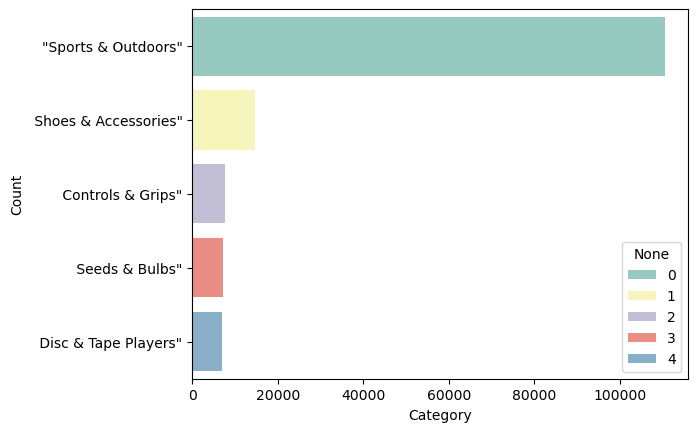

<function matplotlib.pyplot.show(close=None, block=None)>

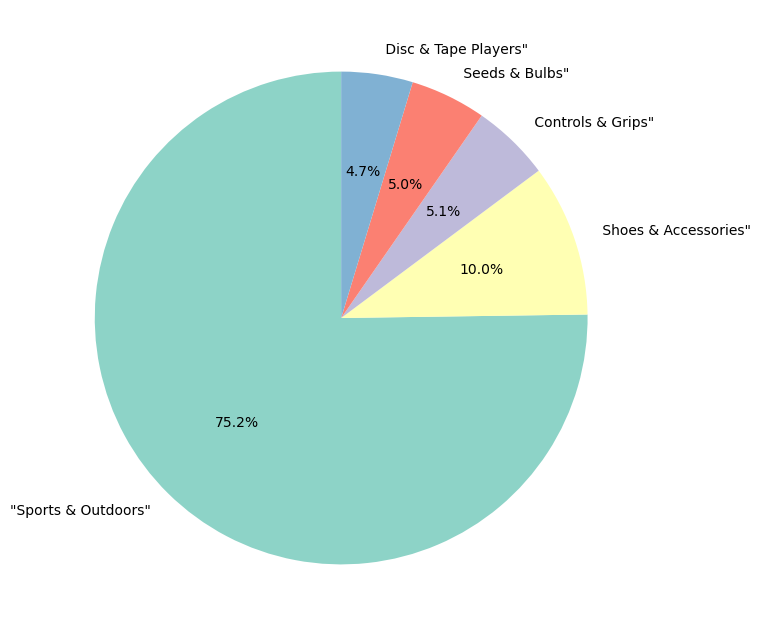

In [7]:
### Part 1: Understanding Product Categories
df.columns
#**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?
#1. **Frequency Tables**:
 #   - Generate a frequency table for the product `category`.
category_table = df['Category'].value_counts ()
 #   - Which are the top 5 most listed product categories?
top_5_cat = category_table.sort_values(ascending=False).head(5)
top_5_cat 
#2. **Visualizations**:
 #   - Display the distribution of products across different categories using a bar chart. 
#*If you face problems understanding the chart, do it for a subset of top categories.*
top_5_cat = category_table.sort_values(ascending=False).head(5)
top_5_cat = top_5_cat.to_frame ()
top_5_cat  = top_5_cat.reset_index()
top_5_cat 

fig, axes = plt.subplots()
sns.barplot(y=top_5_cat['Category'], x=top_5_cat['count'], palette="Set3",hue=top_5_cat.index, legend=True,ax=axes)
axes.set_ylabel("Count")
axes.set_xlabel("Category")
plt.show()
# 4. Add labels and rotation for readability
sns.move_legend(axes, "lower right")
# For a subset of top categories, visualize their proportions using a pie chart. 
#Does any category dominate the listings?
plt.figure(figsize=(10, 8))
plt.pie(
    top_5_cat['count'],             
    labels=top_5_cat['Category'],     
    autopct='%.1f%%',                 
    startangle=90,                    
    colors=sns.color_palette("Set3")  
)
plt.show 

In [8]:
top_5_cat

,Category,count
0,"""Sports & Outdoors""",110534
1,"Shoes & Accessories""",14656
2,"Controls & Grips""",7553
3,"Seeds & Bulbs""",7303
4,"Disc & Tape Players""",6891


C:\Users\akoki\AppData\Local\Temp\ipykernel_5820\1979274463.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Price'].fillna(0, inplace=True)


,UID,Asin,Title,Stars,Reviews,Price,Best_Seller,BoughtInLastMonth,Category
"""1""","""B09B96TG33""","""Echo Dot (5th generation",2022 release) | Big vibrant sound Wi-Fi and B...,"""4.7""","""15308""",21.99,"""False""","""0""","""Hi-Fi Speakers"""
"""3""","""B09B8YWXDF""","""Echo Dot (5th generation",2022 release) | Big vibrant sound Wi-Fi and B...,"""4.7""","""15308""",21.99,"""False""","""0""","""Hi-Fi Speakers"""
"""4""","""B09B8T5VGV""","""Echo Dot with clock (5th generation",2022 release) | Bigger vibrant sound Wi-Fi an...,"""4.7""","""7205""",31.99,"""False""","""0""","""Hi-Fi Speakers"""
"""5""","""B09WX6QD65""","""Introducing Echo Pop | Full sound compact Wi-...","""4.6""","""1881""","""17.99""",0.00,"""0""","""Hi-Fi Speakers""",NaN
"""6""","""B09B97WSLF""","""Echo Dot with clock (5th generation",2022 release) | Bigger vibrant sound Wi-Fi an...,"""4.7""","""7205""",31.99,"""False""","""0""","""Hi-Fi Speakers"""
...,...,...,...,...,...,...,...,...,...
"""2132600""","""B0CD7882VB""","""20PCS Micro Switch Tact Switch Silicone Butto...","""0.0""","""0""","""39.01""",0.00,"""0""","""Networking Devices""",NaN
"""2132601""","""B0CD776ZX8""","""Wireless HD Transmitter and Receiver Kit 1080...","""0.0""","""0""","""33.97""",0.00,"""0""","""Networking Devices""",NaN
"""2132602""","""B0CD76XWSC""","""Oikabio 8 Port Straight-Through CAT6 Panel RJ...","""0.0""","""0""","""11.63""",0.00,"""0""","""Networking Devices""",NaN
"""2132604""","""B0CD75119M""","""Aatraay 4G Dongle Mobile Dongle With Sim 13×1...","""0.0""","""0""","""10.29""",0.00,"""0""","""Networking Devices""",NaN


mean is 17.93, median is 19.17, mode is 0    14.99
Name: Price, dtype: float64
Standard Deviation is 149.38, variance is 22314.442349798872, interquartile range is 9.99,19.17,49.27


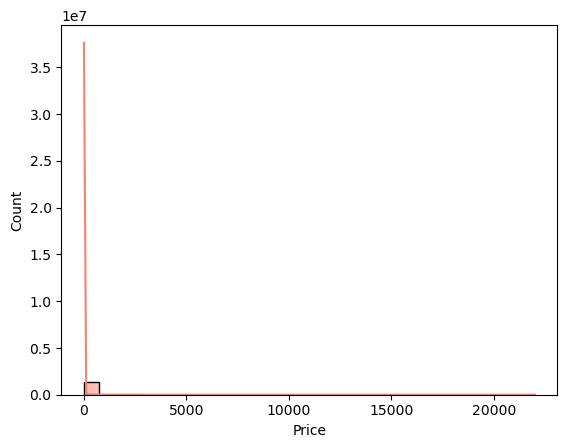

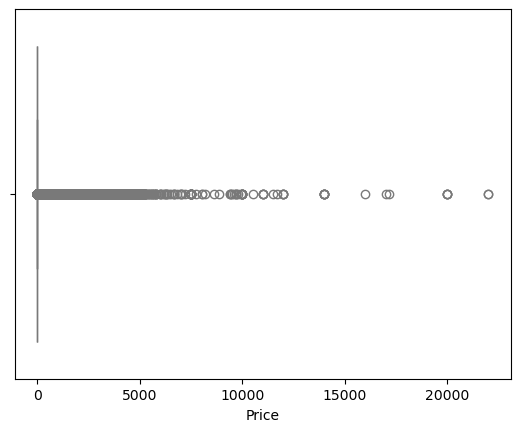

In [25]:
df['Price']= df['Price'].astype(str)
df['Price'] = df['Price'].str.strip().str.replace('"', '', regex=False)
df['Price'] = df['Price'].str.replace('False', '0', regex=False).str.replace('nan', '0', regex=False)
df['Price'] = pd.to_numeric(
    df['Price'],
    errors='coerce'
)

df['Price'].fillna(0, inplace=True)

display (df)
### Part 2: Delving into Product Pricing

#**Business Question**: How are products priced on Amazon UK, 
#and are there specific price points or ranges that are more common?
#1. **Measures of Centrality**:
#Calculate the mean, median, and mode for the `price` of products.
mean = df['Price'].mean()
filtered_prices = df['Price'][df['Price'].notna() & (df['Price'] != 0)]
mode = filtered_prices.mode()
med = filtered_prices.median()
print (f"mean is {mean:.2f}, median is {med}, mode is {mode}")

#What's the average price point of products listed? mean is 17.93, median is 19.17, 

#How does this compare with the most common price point (mode)? mode is 14.99

#2. **Measures of Dispersion**:
#Determine the variance, standard deviation, range, and interquartile range for 
#product `price`. Standard Deviation is 149.38, variance is 22314, interquartile range is 9.99,19.17,49.26
#How varied are the product prices? 149 is a big varience, and theres many variations 
#Are there any indicators of a significant spread in prices? 22314 is a huge price variance
#Is there a specific price range where most products fall? 49.27
std = df['Price'].std()
var = df['Price'].var()
quant25 = filtered_prices.quantile(0.25)
quant50 = filtered_prices.quantile(0.50)
quant75 = filtered_prices.quantile(0.75)
print (f"Standard Deviation is {std:.2f}, variance is {var}, interquartile range is {quant25:.2f},{quant50:.2f},{quant75:.2f}")
#3. **Visualizations**:
#Plot a histogram to visualize the distribution of product prices. 
fig, axes = plt.subplots()
sns.histplot(df['Price'], kde=True, bins=30, color="salmon", ax=axes);
plt.show()
#*If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
#Are there products that are priced significantly higher than the rest? 
#Use a box plot to showcase the spread and potential outliers in product pricing. there is not much
#common price range? 
sns.boxplot(x = df['Price'], color="lightblue");

C:\Users\akoki\AppData\Local\Temp\ipykernel_5820\2500061166.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Stars'].fillna(0, inplace=True)


median is 4.00, mode is 1.00, mean is 3.40
Standard Deviation is 1.41, variance is 1.99, interquartile range is 2.00,4.00,4.50
skewness is -0.67 and kurtosis is -1.08


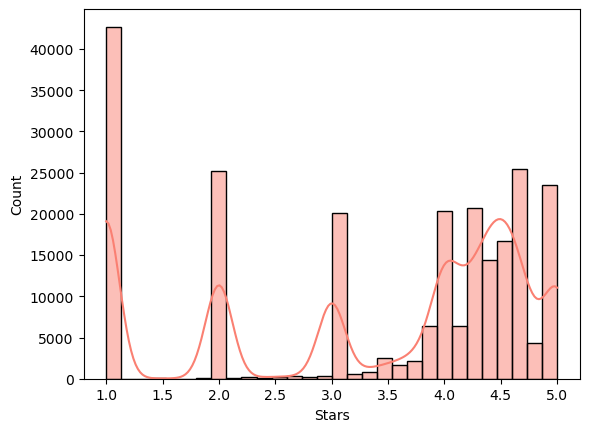

In [41]:
### Part 3: Unpacking Product Ratings

#cleaning all the values of column stars 
df['Stars']= df['Stars'].astype(str)
df['Stars'] = df['Stars'].str.strip().str.replace('"', '', regex=False)
df['Stars'] = df['Stars'].str.replace('False', '0', regex=False).str.replace('nan', '0', regex=False)
df['Stars'] = pd.to_numeric(
    df['Stars'],
    errors='coerce'
)

#filling na 
df['Stars'].fillna(0, inplace=True)


#filtering only for 1-5 values and ignoring something like 1881 
min_rating = 1
max_rating = 5

valid_mask = (df['Stars'] >= min_rating) & (df['Stars'] <= max_rating)
df_cleaned = df[valid_mask].copy()
filtered_ratings = df_cleaned['Stars'][df['Stars'].notna() & (df_cleaned['Stars'] != 0)]
#**Business Question**: How do customers rate products on Amazon UK, 
#and are there any patterns or tendencies in the ratings?

#1. **Measures of Centrality**:
 #   - Calculate the mean, median, and mode for the `rating` of products.
rating_mean = filtered_ratings.mean()
rating_mode = filtered_ratings.mode()
rating_med = filtered_ratings.median()
print (f"median is {rating_med:.2f}, mode is {rating_mode.iloc[0]:.2f}, mean is {rating_mean:.2f}")
 #   - How do customers generally rate products? Is there a common trend? most people rate 1 

#2. **Measures of Dispersion**:
 # Determine the variance, standard deviation, and interquartile range for product `rating`.
std_rating = filtered_ratings.std()
var_rating = filtered_ratings.var()
quant25_rating = filtered_ratings.quantile(0.25)
quant50_rating = filtered_ratings.quantile(0.50)
quant75_rating = filtered_ratings.quantile(0.75)
print (f"Standard Deviation is {std_rating:.2f}, variance is {var_rating:.2f}, interquartile range is {quant25_rating:.2f},{quant50_rating:.2f},{quant75_rating:.2f}")

# Are the ratings consistent, or is there a wide variation in customer feedback? not too much varient

#3. **Shape of the Distribution**:
 # Calculate the skewness and kurtosis for the `rating` column. 
skewness_rating = df_cleaned['Stars'].skew()
kurtosis_rating = df_cleaned['Stars'].kurtosis()
print (f"skewness is {skewness_rating:.2f} and kurtosis is {kurtosis_rating:.2f}")  
 # Are the ratings normally distributed, or do they lean towards higher or lower values? noramlly distributed, slightly negative shape

#4. **Visualizations**:
#Plot a histogram to visualize the distribution of product ratings. 
#Is there a specific rating that is more common?
fig, axes = plt.subplots()
sns.histplot(df_cleaned['Stars'], kde=True, bins=30, color="salmon", ax=axes);
plt.show()

#**Submission**: Submit a Jupyter Notebook which contains code and a business-centric report summarizing your findings. 

In [ ]:
#**Business Question**: How are products priced on Amazon UK, 
#and are there specific price points or ranges that are more common?

#Amazon's prince range greatly and there is not many common price points. 
#47 is the most common price.

#**Business Question**: How do customers rate products on Amazon UK, 
#and are there any patterns or tendencies in the ratings?

#The rating is evenly distributed, with 1 being the most common rating,4-5 is also the most concentrated.

#**Business Question**: What are the most popular product categories on Amazon UK, 
#and how do they compare in terms of listing frequency?

#Sports and Outdoors, most frequent.